In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize

# from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow import keras
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/emotion detection/data/basic/armanTrainCleaned.csv')
df_test = pd.read_csv('/content/drive/MyDrive/emotion detection/data/basic/armanTestCleaned.csv')


In [4]:
df_train.head()

,text,label,cleaned,stemmed
0,خیلی کوچیک هستن و سایزشون بدرد نمیخوره میخوام ...,SAD,کوچیک هستن سایزشون بدرد نمیخوره میخوام بدم,خیلی کوچیک هستن و سایزشون بدرد نمیخوره میخوام ...
1,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم,HATE,صدای پرنده دمای صبح متنفرم متنفرم متنفرم,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم
2,"""کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم...",SAD,کیفیتش خوبه شک خریدم واقعا راضیم حدود ماه متا...,"""کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم..."
3,چون همش با دوربین ثبت شده ، ایا میشه اعتراض زد...,OTHER,همش دوربین ثبت ایا اعتراض زد اصن تاثیر اطلاعی...,چون همش با دوربین ثبت شده ، ایا میشه اعتراض زد...
4,اين وضع ب طرز خنده داري گريه داره ...,SAD,طرز خنده گریه,اين وضع ب طرز خنده داري گريه داره ...


In [5]:
df_train.tail()

,text,label,cleaned,stemmed
6120,مرحوم پیش بینی آبکی زیاد میکرد مرحوم عجب آ...,SURPRISE,مرحوم بینی آبکی زیاد میکرد مرحوم عجب آینده نگ...,مرحوم پیش بینی آبکی زیاد میکرد مرحوم عجب آ...
6121,کلا عین اعتقادات و توئیت زدناتون ... !! در ق...,ANGRY,کلا عین اعتقادات توییت زدناتون قبال رانت نون ...,کلا عین اعتقادات و توئیت زدناتون ... !! در ق...
6122,خب وقتی میگی کسی بیاد مارو بگیره یارو ترس میکن...,FEAR,میگی بیاد مارو بگیره یارو ترس یکم دوست حاله‌ا...,خب وقتی میگی کسی بیاد مارو بگیره یارو ترس میکن...
6123,همون هارو مگه آهنگ جدیدای خواننده‌های دهه ...,SURPRISE,همون هارو آهنگ جدیدای خواننده‌های دهه پنجاه گ...,همون هارو مگه آهنگ جدیدای خواننده‌های دهه ...
6124,نیم دگیرش چطور حل نیشد,OTHER,نیم دگیرش حل نیشد,نیم دگیرش چطور حل نیشد


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6125 entries, 0 to 6124
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     6125 non-null   object
 1   label    6125 non-null   object
 2   cleaned  6074 non-null   object
 3   stemmed  6125 non-null   object
dtypes: object(4)
memory usage: 191.5+ KB


In [7]:
df_train[df_train.isna().any(axis=1)]


,text,label,cleaned,stemmed
3764,به کی؟؟؟,OTHER,NaN,به کی؟؟؟
3772,آخ گفتی,OTHER,NaN,آخ گفتی
3875,فوق چی؟,OTHER,NaN,فوق چی؟
3902,به به,HAPPY,NaN,به به
3912,ما کی هستیم؟؟؟چی هستیم؟؟؟,OTHER,NaN,ما کی هستیم؟؟؟چی هستیم؟؟؟
3942,چی چند؟,OTHER,NaN,چی چند؟
3958,من هستم,OTHER,NaN,من هستم
3968,برای چی؟,SURPRISE,NaN,برای چی؟
4087,مگه الان نیستیم؟!,SURPRISE,NaN,مگه الان نیستیم؟!
4171,آخ گفتی,OTHER,NaN,آخ گفتی


In [8]:
df_train = df_train.dropna()


In [9]:
df_train.duplicated().sum()


27

In [10]:
df_train = df_train.drop_duplicates()

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6047 entries, 0 to 6124
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     6047 non-null   object
 1   label    6047 non-null   object
 2   cleaned  6047 non-null   object
 3   stemmed  6047 non-null   object
dtypes: object(4)
memory usage: 236.2+ KB


In [12]:
df_test.head()

,text,label,cleaned,stemmed
0,اين شايد اولين عزاى عمومى واقعى است كه ياد دار...,SAD,اولین عزای عمومی یاد وجودم عزادار است؛ پر گری...,اين شايد اولين عزاى عمومى واقعى است كه ياد دار...
1,دیشب بعد از ارسال تویت مربوط به آثار باستانی ت...,HAPPY,دیشب ارسال تویت مربوط آثار باستانی تویت نوشتم...,دیشب بعد از ارسال تویت مربوط به آثار باستانی ت...
2,کدوم شعبه پول نداده، بگو الان برات آمار دقیق ...,OTHER,کدوم شعبه پول نداده برات آمار دقیق بدم شعار ا...,کدوم شعبه پول نداده، بگو الان برات آمار دقیق ...
3,امروز وسط یه بحث با بابا مامانم گفتم آدم باید ...,HAPPY,وسط بحث بابا مامانم آدم تلاش کنه شادی قلبش بع...,امروز وسط یه بحث با بابا مامانم گفتم آدم باید ...
4,امشب گفت نامزدی دوستش که ادم روشنفکری است بهم ...,SAD,امشب نامزدی دوستش ادم روشنفکری بهم خورده دختر...,امشب گفت نامزدی دوستش که ادم روشنفکری است بهم ...


In [13]:
df_test.tail()

,text,label,cleaned,stemmed
1146,یعنی این آهنگ مرغ سحر جوری ساخته شده و روی این...,HAPPY,آهنگ مرغ سحر جوری شعر نشسته انگار ازل شعر هیش...,یعنی این آهنگ مرغ سحر جوری ساخته شده و روی این...
1147,درود بر همه ایرانیان شریف که در این سرما در تظ...,HAPPY,درود ایرانیان شریف سرما تظاهرات بیاد ماندنی ز...,درود بر همه ایرانیان شریف که در این سرما در تظ...
1148,امروز تولدم است،عید است ولی شاد نیستم،عید و تو...,SAD,تولدم عید شاد عید تولد شادمانه روزی هموطن عقی...,امروز تولدم است،عید است ولی شاد نیستم،عید و تو...
1149,لعنت به اونی که دلتنگ نگهت میداره...,SAD,لعنت اونی دلتنگ نگهت میداره,لعنت به اونی که دلتنگ نگهت میداره...
1150,من در شگفت انگیز و قبل از بالا رفتن قیمت ها به...,HAPPY,شگفت انگیز رفتن قیمت پیشنهاد همسرم خرید نتیجه...,من در شگفت انگیز و قبل از بالا رفتن قیمت ها به...


In [14]:
df_test[df_test.isna().any(axis=1)]


,text,label,cleaned,stemmed


In [15]:
df_train.duplicated().sum()


0

In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     1151 non-null   object
 1   label    1151 non-null   object
 2   cleaned  1151 non-null   object
 3   stemmed  1151 non-null   object
dtypes: object(4)
memory usage: 36.1+ KB


In [17]:
df_train['label'].value_counts()


OTHER       1654
ANGRY        916
SAD          896
FEAR         745
SURPRISE     717
HAPPY        608
HATE         511
Name: label, dtype: int64

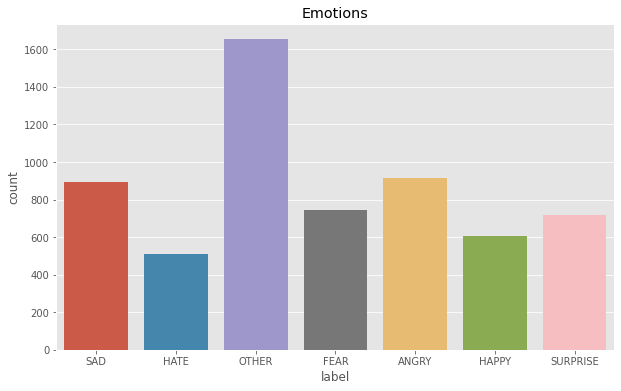

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
sns.countplot(x='label', data=df_train).set(title='Emotions');

In [19]:
df_test['label'].value_counts()


HAPPY       275
SAD         262
OTHER       193
ANGRY       154
SURPRISE    145
HATE         65
FEAR         57
Name: label, dtype: int64

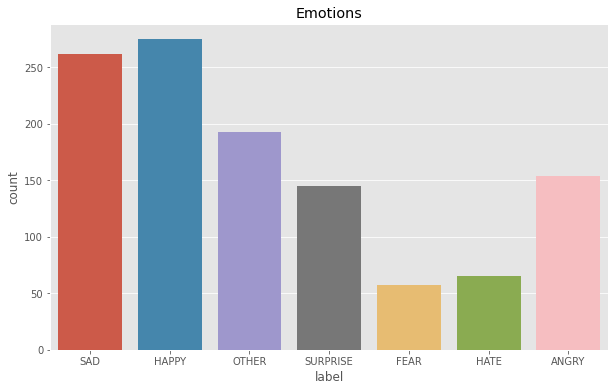

In [20]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
sns.countplot(x='label', data=df_test).set(title='Emotions');

## give labels numbers

In [21]:
labels_cat = {'FEAR': 0, 'SAD': 1, 'SURPRISE': 2, 'OTHER': 3, 'HAPPY': 4, 'HATE':5, 'ANGRY': 6}
df_train.label = [labels_cat[item] for item in df_train.label]
df_test.label = [labels_cat[item] for item in df_test.label]

In [22]:
labels_train = df_train['label'].values
labels_test = df_test['label'].values


## Split data to train test and validation

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
X_train, X_val, y_train, y_val = train_test_split(df_train.stemmed, labels_train, test_size=0.15, random_state=42)


In [25]:
X_train.shape

(5139,)

In [26]:
y_train.shape

(5139,)

In [27]:
X_val.shape

(908,)

In [28]:
y_val.shape

(908,)

In [29]:
X_test = df_test['stemmed']
y_test = labels_test

In [30]:
X_test.shape

(1151,)

In [31]:
y_test.shape

(1151,)

In [32]:
input_dim = X_train.shape


## Build a vector for each label with 7 elements and make the real label 1

In [33]:
y_train = np_utils.to_categorical(y_train, num_classes = 7, dtype ="int32")
y_test = np_utils.to_categorical(y_test, num_classes = 7, dtype ="int32")
y_val = np_utils.to_categorical(y_val, num_classes = 7, dtype ="int32")

## Tokenize

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer


In [35]:
tokenizer = Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts(pd.concat([X_train, X_test], axis=0))

In [36]:
tokenizer.document_count



6290

In [37]:
tokenizer.texts_to_sequences(X_train[0].split())


[[19], [1917], [302], [2], [14828], [3557], [3348], [240], [110], [18]]

In [38]:
tokenizer.texts_to_matrix(X_train[0].split())


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

## Padding
The vectors we obtain are generally not of equal lengths

For that, we might need to pad the sequences to max len.

In [40]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [41]:
maxlen_train = max([len(t) for t in df_train['cleaned']])
maxlen_test = max([len(t) for t in df_test['cleaned']])

In [42]:
maxlen_train

2007

In [43]:
maxlen_test

240

In [44]:
X_train = pad_sequences(sequences_train, maxlen=2007, truncating='pre')
X_test = pad_sequences(sequences_test, maxlen=2007, truncating='pre')
X_val = pad_sequences(sequences_val, maxlen=2007, truncating='pre')

In [45]:
vocabSize = len(tokenizer.index_word) + 1
print(f"Vocabulary size = {vocabSize}")

Vocabulary size = 26913


In [46]:
sequences_train[0]


[68, 9796]

In [47]:
X_train[0]


array([   0,    0,    0, ...,    0,   68, 9796], dtype=int32)

## Word Embedding
This code defines the following variables:

path_to_glove_file: The file path to the GloVe word vectors file.

num_tokens: The size of the vocabulary. This is typically the number of unique words in the dataset.

embedding_dim: The dimensionality of the word vectors. This is usually set to a fixed value (e.g., 200, 300, etc.) depending on the size of the word vectors file that is being used.

hits: A counter for the number of words that are found in the embeddings_index dictionary.

misses: A counter for the number of words that are not found in the embeddings_index dictionary.

embeddings_index: A dictionary that will store the word vectors, with the words as keys and the word vectors as values.

In [48]:
# Read GloVE embeddings

path_to_glove_file = '/content/drive/MyDrive/emotion detection/data/glove.6B.50d.txt'
# path_to_glove_file = '/content/drive/MyDrive/emotion detection/data/glove.6B.200d.txt'

num_tokens = vocabSize
embedding_dim = 50 #latent factors or features  
hits = 0
misses = 0
embeddings_index = {}

I will intialize an embedding matrix with all zero values and then looping through the vocabulary (as defined by the tokenizer object) to assign word vectors to the corresponding rows of the embedding matrix. The word_index attribute of the tokenizer object is a dictionary that maps words to their indices in the vocabulary.

The embedding matrix will have a size of num_tokens rows and embedding_dim columns, where num_tokens is the size of the vocabulary and embedding_dim is the dimensionality of the word vectors.

For each word in the vocabulary, the code looks up the corresponding word vector in the embeddings_index dictionary and assigns it to the corresponding row of the embedding matrix. If the word is not found in the embeddings_index dictionary (i.e., if embedding_vector is None), the code increments the misses counter and the row of the embedding matrix remains all-zeros. If the word is found in the embeddings_index dictionary, the code increments the hits counter and assigns the word vector to the corresponding row of the embedding matrix. Finally, the code prints out the number of words that were converted (hits) and the number that were not found in the embeddings_index dictionary (misses).

In [49]:
# Read word vectors
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs
print("Found %s word vectors." % len(embeddings_index))

# Assign word vectors to our dictionary/vocabulary
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Found 400000 word vectors.
Converted 353 words (26559 misses)


## Modeling
The model consists of several layers:

An Embedding layer that takes in integer-encoded text and looks up the embedding vector for each word in the input. The input length is set to the length of the input sequences, and the weights are initialized with an embedding matrix that has been pre-trained on a large dataset. The embedding layer is not trainable, meaning that the weights of this layer will not be updated during training.

Three Bidirectional layers, each of which applies a forward and backward LSTM to the input. LSTMs are a type of recurrent neural network that are able to capture long-term dependencies in sequential data. The dropout and recurrent dropout arguments specify the dropout rate to apply to the inputs and recurrent inputs of the LSTMs, respectively. The return_sequences argument specifies whether the LSTM should return the full sequences of outputs or just the last output of each sequence.

A Dense layer that applies a linear transformation to the input to produce the output. The output has 7 units and uses the 'softmax' activation function, which means that it will output a probability distribution over the 7 classes.

In [50]:
nb_classes = 7
batch_size = 128
nb_epochs = 2

In [51]:
# Build neural network architecture

# adam = Adam(learning_rate=0.005)
adam = Adam(learning_rate=0.001)

model = Sequential()
model.add(Embedding(vocabSize, 50, input_length=X_train.shape[1], weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(256, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2007, 50)          1345650   
                                                                 
 bidirectional (Bidirectiona  (None, 2007, 512)        628736    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 2007, 256)        656384    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 7)                 1799      
                                                        

## plot the model

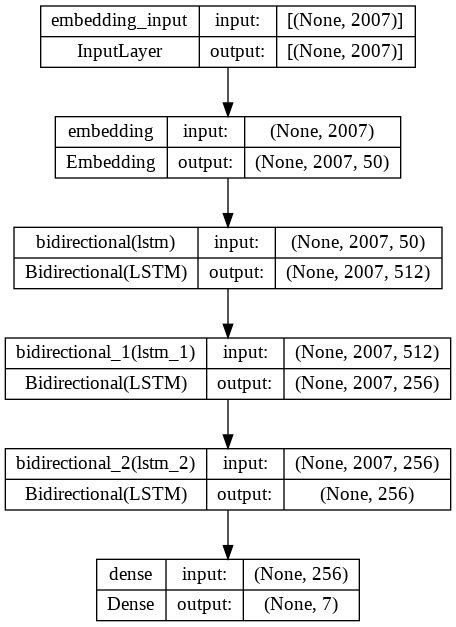

In [52]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True)

In [53]:
#to stop the training when the loss starts to increase
callback = EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True,
)

In [54]:
# Fit model
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    batch_size=batch_size,
                    epochs=nb_epochs,
                    callbacks=[callback]
                   )

Epoch 1/2


ResourceExhaustedError: ignored